In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gan = np.load('../../experiments/runs/SHO_run_Feb252020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/SHO_run_Feb252020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/SHO_run_Feb252020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/SHO_run_Feb252020_SmoothL1Compare/train_mse.npy')

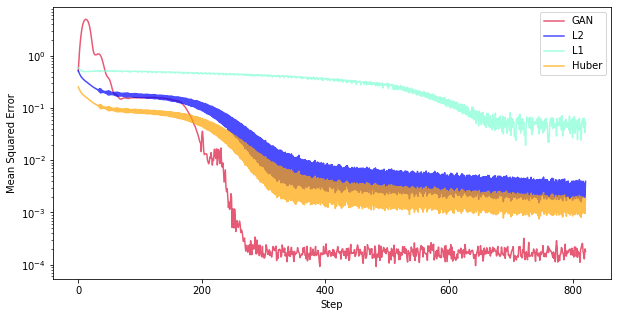

In [4]:
steps = np.arange(len(gan))
a = 0.7
plt.figure(figsize=(10,5))
plt.plot(steps, gan, label='GAN', color='crimson', alpha=a)
plt.plot(steps, l2, label='L2', color='blue', alpha=a)
plt.plot(steps, l1, label='L1', color='aquamarine', alpha=a)
plt.plot(steps, huber, label='Huber', color='orange', alpha=a)
plt.legend()
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');

In [9]:
gan_reps = np.load('../../denn/sho_rand_reps.npy')
l2_reps = np.load('../../denn/sho_rand_reps_L2.npy')
l1_reps = np.load('../../denn/sho_rand_reps_L1.npy')
huber_reps = np.load('../../denn/sho_rand_reps_smoothL1.npy')

In [2]:
import denn.utils

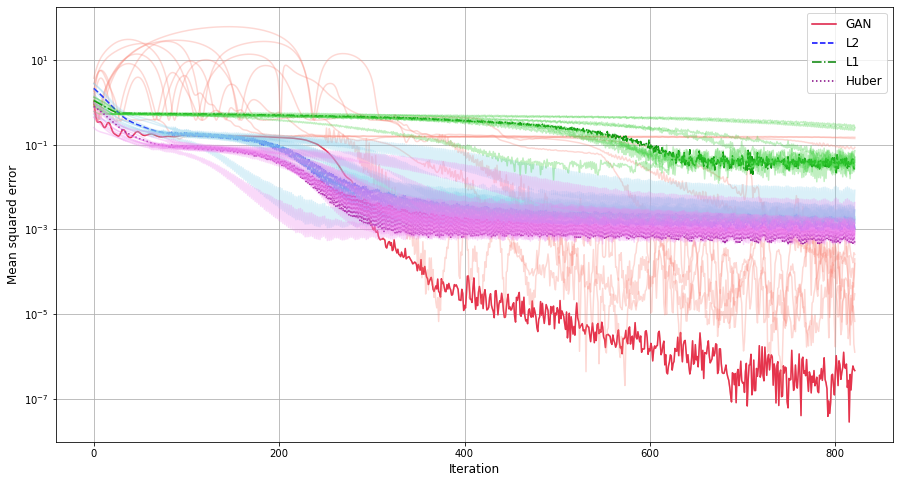

In [28]:
plt.figure(figsize=(15,8))
plt.yscale('log')

a=0.3

# gan
plt.plot(steps, gan_reps[np.argmin(gan_reps[:,-1]),:], 
         color='crimson', label='GAN', linestyle='solid')
for i in range(gan_reps.shape[0]):
    plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, l2_reps[np.argmin(l2_reps[:,-1]),:], 
         color='blue', label='L2', linestyle='dashed')
for i in range(l2_reps.shape[0]):
    plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, l1_reps[np.argmin(l1_reps[:,-1]),:], 
         color='green', label='L1', linestyle='dashdot')
for i in range(l1_reps.shape[0]):
    plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, huber_reps[np.argmin(huber_reps[:,-1]),:], 
         color='purple', label='Huber', linestyle='dotted')
for i in range(huber_reps.shape[0]):
    plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
plt.savefig('sho_rand_reps.jpg');

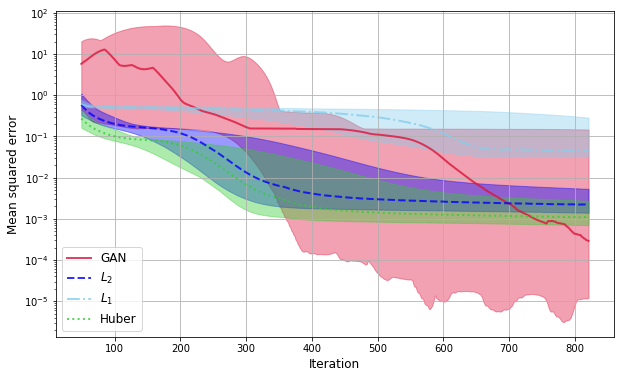

In [11]:
arrs = [gan_reps, l2_reps, l1_reps, huber_reps]
ut.plot_reps_results(arrs, fname='sho_rand_reps_model_random.jpg', window=50, figsize=(10,6))

# RK4

In [89]:
from denn.rk4 import rk4

In [90]:
def sho_deriv(t, xz):
    """ 
    dxdt = z
    dzdt = -x
    """
    x = xz[0]
    z = xz[1]
    rhs = np.array([z, -x])
    return rhs

In [91]:
t, sol = rk4(sho_deriv, [0, 6.28], [0,1], 100)

In [92]:
x = sol[:,0]

In [93]:
mse = np.mean((x - np.sin(t))**2)

In [94]:
mse

1.1385242064350767e-13

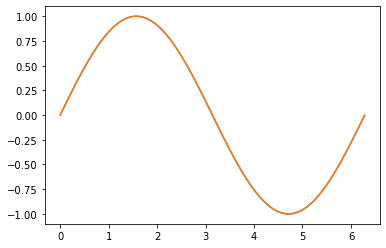

In [95]:
plt.plot(t, x)
plt.plot(t, np.sin(t))

# Only Change Perturb Randomness

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# gan_reps = np.load('../../experiments/reps/sho_gan_rand_reps_fixedmodels.npy')
gan_reps = np.load("/Users/dylanrandle/Downloads/sho_gan_rand_reps_may18_2020.npy")
# l2_reps = np.load('../../experiments/reps/sho_l2_rand_reps_fixedmodels.npy')
l2_reps = np.load("/Users/dylanrandle/Downloads/sho_mse_rand_reps_may18_2020.npy")
# l2_reps2 = np.load("/Users/dylanrandle/Downloads/sho_mse_rand_reps_may18_2020_defaultLR.npy")
# l1_reps = np.load('../../experiments/reps/sho_l1_rand_reps_fixedmodels.npy')
l1_reps = np.load("/Users/dylanrandle/Downloads/sho_l1_rand_reps_may18_2020.npy")
# huber_reps = np.load('../../experiments/reps/sho_huber_rand_reps_fixedmodels.npy')
huber_reps = np.load("/Users/dylanrandle/Downloads/sho_huber_rand_reps_may18_2020.npy")

In [117]:
import denn.utils as ut

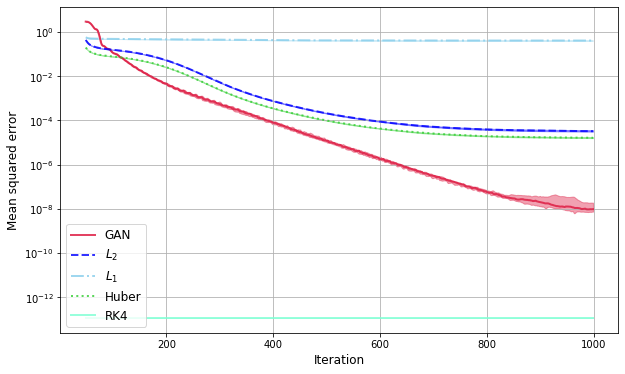

In [118]:
arrs_dict = {"GAN": gan_reps, "$L_2$": l2_reps,
             "$L_1$": l1_reps, 
             "Huber": huber_reps, 
             "RK4": mse*np.ones_like(l2_reps)}
ut.plot_reps_results(arrs_dict, fname=None, window=50, figsize=(10,6))

# After tuning classical

In [4]:
l2_reps_tuned = np.load('../../experiments/reps/sho_l2_rand_reps_classical_tuned.npy')
l1_reps_tuned = np.load('../../experiments/reps/sho_l1_rand_reps_classical_tuned.npy')
huber_reps_tuned = np.load('../../experiments/reps/sho_huber_rand_reps_classical_tuned.npy')

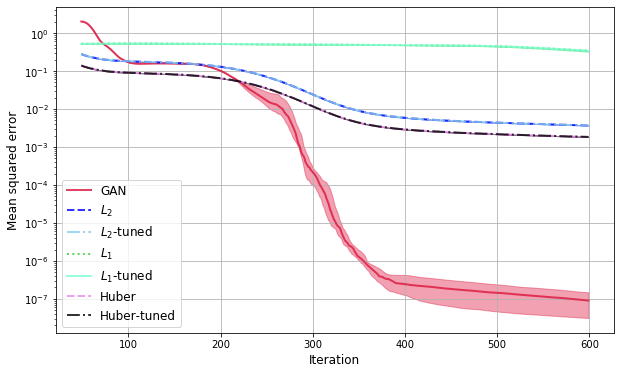

In [5]:
arrs_dict = {"GAN": gan_reps, 
             "$L_2$": l2_reps,
             "$L_2$-tuned": l2_reps_tuned,
             "$L_1$": l1_reps, 
             "$L_1$-tuned": l1_reps_tuned,
             "Huber": huber_reps,
             "Huber-tuned": huber_reps_tuned}
ut.plot_reps_results(arrs_dict, fname="sho_rand_reps_classic_tune.png", figsize=(10,6), window=50)